In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'DOH COVID Data Drop 20201022 - 04 Case Information.csv')

In [3]:
data.describe()

,Age
count,361693.000000
mean,38.080931
std,16.583849
min,0.000000
25%,26.000000
50%,35.000000
75%,49.000000
max,107.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363888 entries, 0 to 363887
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CaseCode           363888 non-null  object 
 1   Age                361693 non-null  float64
 2   AgeGroup           361693 non-null  object 
 3   Sex                363888 non-null  object 
 4   DateSpecimen       308027 non-null  object 
 5   DateResultRelease  309246 non-null  object 
 6   DateRepConf        363888 non-null  object 
 7   DateDied           6753 non-null    object 
 8   DateRecover        83813 non-null   object 
 9   RemovalType        319116 non-null  object 
 10  Admitted           363737 non-null  object 
 11  RegionRes          360182 non-null  object 
 12  ProvRes            338949 non-null  object 
 13  CityMunRes         328393 non-null  object 
 14  CityMuniPSGC       328393 non-null  object 
 15  BarangayRes        135168 non-null  object 
 16  Ba

In [5]:
data = data.sample(50000)

In [6]:
#TODO: DATA CLEANING - DATE SPECIMEN DROPPING = 1 MONTH (using DateSpecimen col)

df = data.drop(data.loc[:, 'CaseCode':'Age'].columns, axis=1)
df = df.drop('Sex', axis=1)
df = df.drop(df.loc[:, 'DateResultRelease':'Admitted'].columns, axis=1)
df = df.drop('ProvRes', axis=1)
df = df.drop(df.loc[:, 'CityMuniPSGC':'BarangayPSGC'].columns, axis=1)
df = df.drop(df.loc[:, 'DateOnset':'ValidationStatus'].columns, axis=1)
df

,AgeGroup,DateSpecimen,RegionRes,CityMunRes,HealthStatus,Quarantined
276984,55 to 59,2020-06-24,Region VII: Central Visayas,CONSOLACION,RECOVERED,NO
73041,15 to 19,2020-08-12,NCR,CALOOCAN CITY,RECOVERED,YES
15227,20 to 24,2020-07-27,ROF,NaN,RECOVERED,NO
259976,45 to 49,2020-07-25,NCR,CITY OF NAVOTAS,RECOVERED,YES
246253,55 to 59,2020-07-03,Region VII: Central Visayas,CEBU CITY (CAPITAL),RECOVERED,NO
...,...,...,...,...,...,...
302630,35 to 39,NaN,Region IV-A: CALABARZON,SANTO TOMAS,RECOVERED,YES
86165,NaN,2020-07-20,NCR,CITY OF MUNTINLUPA,RECOVERED,NO
317935,40 to 44,2020-09-26,Region VI: Western Visayas,SILAY CITY,RECOVERED,YES
334480,40 to 44,2020-09-04,NCR,CITY OF MANILA,RECOVERED,YES


In [7]:
titles = list(df.columns)
titles

['AgeGroup',
 'DateSpecimen',
 'RegionRes',
 'CityMunRes',
 'HealthStatus',
 'Quarantined']

In [8]:
titles[4], titles[5] = titles[5], titles[4]
titles[1], titles[2], titles[3] = titles[3], titles[2], titles[1]
titles

['AgeGroup',
 'CityMunRes',
 'RegionRes',
 'DateSpecimen',
 'Quarantined',
 'HealthStatus']

In [9]:
df = df[titles]
df

,AgeGroup,CityMunRes,RegionRes,DateSpecimen,Quarantined,HealthStatus
276984,55 to 59,CONSOLACION,Region VII: Central Visayas,2020-06-24,NO,RECOVERED
73041,15 to 19,CALOOCAN CITY,NCR,2020-08-12,YES,RECOVERED
15227,20 to 24,NaN,ROF,2020-07-27,NO,RECOVERED
259976,45 to 49,CITY OF NAVOTAS,NCR,2020-07-25,YES,RECOVERED
246253,55 to 59,CEBU CITY (CAPITAL),Region VII: Central Visayas,2020-07-03,NO,RECOVERED
...,...,...,...,...,...,...
302630,35 to 39,SANTO TOMAS,Region IV-A: CALABARZON,NaN,YES,RECOVERED
86165,NaN,CITY OF MUNTINLUPA,NCR,2020-07-20,NO,RECOVERED
317935,40 to 44,SILAY CITY,Region VI: Western Visayas,2020-09-26,YES,RECOVERED
334480,40 to 44,CITY OF MANILA,NCR,2020-09-04,YES,RECOVERED


In [10]:
start_date = '2020-09-10'
end_date = '2020-10-10'

df = df.loc[df['RegionRes'] == 'NCR']
df = df.loc[(df['CityMunRes'] == 'CITY OF MANILA') | (df['CityMunRes'] == 'QUEZON CITY')]
df = df.loc[(df['DateSpecimen'] >= start_date) & ((df['DateSpecimen'] <= end_date))]
df = df.reset_index(drop=True)

df

,AgeGroup,CityMunRes,RegionRes,DateSpecimen,Quarantined,HealthStatus
0,20 to 24,QUEZON CITY,NCR,2020-09-10,NO,MILD
1,50 to 54,QUEZON CITY,NCR,2020-10-05,NO,MILD
2,15 to 19,QUEZON CITY,NCR,2020-09-21,NO,RECOVERED
3,40 to 44,CITY OF MANILA,NCR,2020-10-08,NO,MILD
4,70 to 74,QUEZON CITY,NCR,2020-09-21,NO,RECOVERED
...,...,...,...,...,...,...
990,45 to 49,QUEZON CITY,NCR,2020-09-25,NO,RECOVERED
991,25 to 29,QUEZON CITY,NCR,2020-10-08,NO,MILD
992,65 to 69,QUEZON CITY,NCR,2020-10-01,NO,MILD
993,20 to 24,QUEZON CITY,NCR,2020-10-04,NO,MILD


In [11]:
df = df.dropna()
df = df.reset_index(drop=True)
df

,AgeGroup,CityMunRes,RegionRes,DateSpecimen,Quarantined,HealthStatus
0,20 to 24,QUEZON CITY,NCR,2020-09-10,NO,MILD
1,50 to 54,QUEZON CITY,NCR,2020-10-05,NO,MILD
2,15 to 19,QUEZON CITY,NCR,2020-09-21,NO,RECOVERED
3,40 to 44,CITY OF MANILA,NCR,2020-10-08,NO,MILD
4,70 to 74,QUEZON CITY,NCR,2020-09-21,NO,RECOVERED
...,...,...,...,...,...,...
990,45 to 49,QUEZON CITY,NCR,2020-09-25,NO,RECOVERED
991,25 to 29,QUEZON CITY,NCR,2020-10-08,NO,MILD
992,65 to 69,QUEZON CITY,NCR,2020-10-01,NO,MILD
993,20 to 24,QUEZON CITY,NCR,2020-10-04,NO,MILD


In [12]:
df['HealthStatus'].value_counts()

RECOVERED       522
MILD            448
DIED             13
ASYMPTOMATIC      6
SEVERE            4
CRITICAL          2
Name: HealthStatus, dtype: int64

In [13]:
unique = df['CityMunRes'].unique().tolist()
uniAgeG = df['AgeGroup'].unique().tolist()
uniHealth = df['HealthStatus'].unique().tolist()

In [14]:
for i in range(len(df)):
    for j in unique:
        if df['CityMunRes'][i] == j:
            df['CityMunRes'][i] = unique.index(j)
    
    for k in uniAgeG:
        if df['AgeGroup'][i] == k:
            df['AgeGroup'][i] = uniAgeG.index(k)

    for l in uniHealth:
        if df['HealthStatus'][i] == l:
            df['HealthStatus'][i] = uniHealth.index(l)

In [15]:
column = df.loc[:, 'AgeGroup':'CityMunRes'].columns.to_list() # SUBJECT TO CHANGE
x = df[column].astype('int')
y = df['HealthStatus'].astype('int')

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [17]:
logreg = LogisticRegression()

In [18]:
logreg.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
y_pred = logreg.predict(x_test)

In [20]:
matrix = metrics.confusion_matrix(y_test, y_pred)
matrix

array([[  0, 103,   0,   0,   0],
       [  0,  92,   0,   0,   0],
       [  0,   2,   0,   0,   0],
       [  0,   1,   0,   0,   0],
       [  0,   1,   0,   0,   0]], dtype=int64)

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       103
           1       0.46      1.00      0.63        92
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1

    accuracy                           0.46       199
   macro avg       0.09      0.20      0.13       199
weighted avg       0.21      0.46      0.29       199



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
import seaborn as sns

In [23]:
uniHealth

['MILD', 'RECOVERED', 'ASYMPTOMATIC', 'DIED', 'CRITICAL', 'SEVERE']

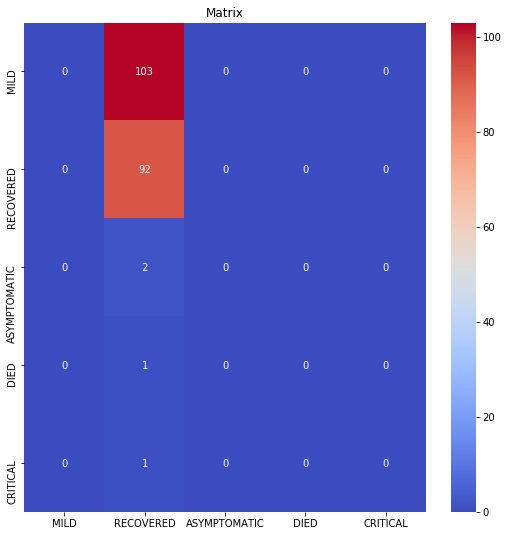

In [24]:
plt.figure(figsize=(9,9))
ax = sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="coolwarm",fmt='g')
ax.xaxis.set_label_position("top")
ax.set_xticklabels([uniHealth[0],uniHealth[1],uniHealth[2],uniHealth[3],uniHealth[4],uniHealth[5]])
ax.set_yticklabels([uniHealth[0],uniHealth[1],uniHealth[2],uniHealth[3],uniHealth[4],uniHealth[5]])
plt.title('Matrix')
plt.show()